# 21M.387 Fundamentals of Music Processing
## Lab3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import sys
sys.path.append("..")
import fmplib as fmp
from fmplib.pyqueue import connect_to_queue

plt.rcParams['figure.figsize'] = (12, 4)
fmp.documentation_button()

## Python Review

You should be comfortable with numpy vectors at this point. The following review may be helpful for numpy matrices.

You can create a matrix explicitly as shown below. You can also ask a matrix for its dimensions with `shape` (this is a property, not a function).

In [2]:
a = np.array( ((1,2,3,4), (5,6,7,8), (9,10,11,12)) )
print(a)
print('shape is', a.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
shape is (3, 4)


The dimensions of a matrix are always: Rows x Columns.

You can do matrix indexing and slicing very similarly to vector slicing.  
A colon by itself (`:`) selects an entire row or column.

In [3]:
print('a[1,2] = ')
print(a[1,2], '\n')

print('a[0:2,1:3] =')
print(a[0:2,1:3], '\n')

print('a[2, :] =')
print(a[2, :], '\n')

print('a[:, 2] =')
print(a[:, 2])
print('Note this presents itself as a vector, even though it is a column')

a[1,2] = 
7 

a[0:2,1:3] =
[[2 3]
 [6 7]] 

a[2, :] =
[ 9 10 11 12] 

a[:, 2] =
[ 3  7 11]
Note this presents itself as a vector, even though it is a column


You can set matrix elements by slicing as well. For example:

In [4]:
a = np.random.random((4,6))
print(a, '\n')

# set the corners to specific values
a[0,0] = 1
a[0,-1] = 2
a[-1,-1] = 3
a[-1,0] = 4
print(a, '\n')

# set an entire row or column
a[1,:] = 0
a[:,2] = 0

print(a, '\n')

[[0.32255028 0.78227267 0.11993128 0.01311488 0.59745549 0.38762874]
 [0.59166583 0.88355214 0.75725771 0.70392054 0.2603879  0.46603351]
 [0.0643729  0.3615126  0.66215687 0.04860455 0.24912782 0.44461172]
 [0.67633225 0.94808179 0.57175065 0.88271087 0.99980158 0.12013771]] 

[[1.         0.78227267 0.11993128 0.01311488 0.59745549 2.        ]
 [0.59166583 0.88355214 0.75725771 0.70392054 0.2603879  0.46603351]
 [0.0643729  0.3615126  0.66215687 0.04860455 0.24912782 0.44461172]
 [4.         0.94808179 0.57175065 0.88271087 0.99980158 3.        ]] 

[[1.         0.78227267 0.         0.01311488 0.59745549 2.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.0643729  0.3615126  0.         0.04860455 0.24912782 0.44461172]
 [4.         0.94808179 0.         0.88271087 0.99980158 3.        ]] 



## Exercise 1

- Load the small bit of audio below and listen to it.
- Plot it.
- Identify the approximate start location of the first note ($n_1$). Actually, make $n_1$ a bit later than the exact start, so that you are past the note's transient.
- Create $x$: a window of length $N=1024$ starting at $n_1$ of the audio.
- Plot $x$.
- Create $x_w$: $x$ multiplied by a Hann window of the same length (see `np.hanning()`).
- Plot $x_w$.

In [5]:
snd1 = fmp.load_wav("audio/piano_arpeg.wav")
fs = 22050
ipd.Audio(snd1, rate=fs)

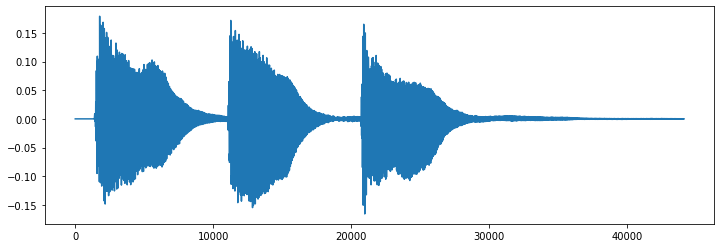

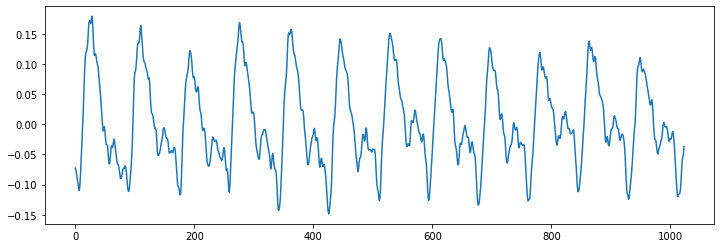

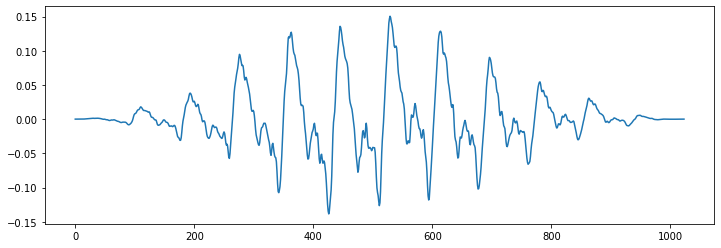

In [6]:
plt.plot(snd1)
plt.show()

n1 = 1740  # visual inspection
N = 1024
x = snd1[n1:n1+N]
plt.plot(x)
plt.show()

x_w = x * np.hanning(N)
plt.plot(x_w)
plt.show()

In [7]:
connect_to_queue()

## Exercise 2

- Create  $\lvert X \lvert$, the magnitude of the first 1/2 of DFT of $x_w$ using  `np.fft.rfft` module.
- Plot it.
- Find the top 4 peaks of this signal (using `fmp.find_peaks`). You may need to play around with the optional `thresh` parameter to get only the highest 4 peaks of $\lvert X \lvert$.
- Plot the peaks
- Print out the bin numbers for these top 4 peaks.

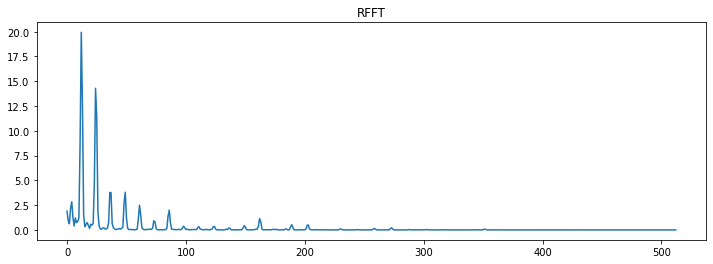

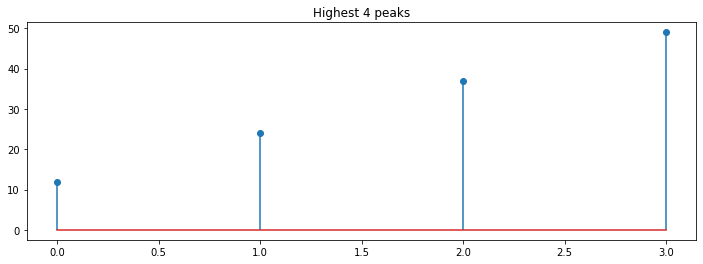

bins: [12 24 37 49]


In [8]:
X = np.abs(np.fft.rfft(x_w))

plt.plot(X)
plt.title('RFFT')
plt.show()

peaks = fmp.find_peaks(X, thresh=0.15)
plt.stem(peaks)
plt.title('Highest 4 peaks')
plt.show()

print(f'bins: {peaks}')
#print([X[i] for i in peaks])

In [9]:
connect_to_queue()

## Exercise 3a

- Write the function `bin_to_freq` which returns the frequency of a given FFT bin ($k$). This function should work with inputs that are scalars or vectors. (Hint: what other inputs does this function need?)
- Print the frequencies of the peaks of your DFT.

In [10]:
def bin_to_freq(k, n):
    if isinstance(k, (list, np.ndarray)):
        return [i * fs / n for i in k]
    return k * fs / n

# print peak frequencies
#print(bin_to_freq(peaks[0], N)) # scalar
print(bin_to_freq(peaks, N))  # vector

[258.3984375, 516.796875, 796.728515625, 1055.126953125]


## Exercise 3b

- Write the function `freq_to_pitch` which returns the midi pitch (as a floating point value) from a given frequency. 
- Print the midi pitches of the peaks of your DFT.

Since that first note is an C4 played on piano, the first 4 pitches should correspond roughly to the first 4 harmonics: C4, C5, G5, C6.

How accurate are the pitches from your DFT analysis?

In [11]:
def freq_to_pitch(f):
    freq_A4 = 440
    return 12*np.log2(f/(freq_A4*1.0)) + 69

# print midi pitches
p = [freq_to_pitch(f) for f in bin_to_freq(peaks, N)]
print(f'pitches from DFT: {p}')

# how accurate are the pitches from DFT analysis? not very.
diff = np.array([60, 72, 79, 84]) - p
print(f'diff from expected pitches (C4, C5, G5, C6): {diff}')

pitches from DFT: [59.7851258703449, 71.7851258703449, 79.27901624923842, 84.14209399107352]
diff from expected pitches (C4, C5, G5, C6): [ 0.21487413  0.21487413 -0.27901625 -0.14209399]


In [12]:
connect_to_queue()

## Exercise 4

The frequency resolution of the DFT with the current $N$ is not that good. You can see that the pitches are not very accurate.

One way to help the accuracy is to increase $N$. In this exercise, lets increase $N$ by zero-padding the windowed signal $x_w$.

- Create a function `zpad` that zero-pads a vector to new length $N_{zp}$. You can use `np.concatenate` or `np.pad`.
- Repeat this process (Exercises 2 and 3) to arrive at a set of midi pitch values for $x_w$, while trying out increasing values of $N_{zp}$. It is generally good practice (but not mandatory) that $N_{zp}$ be a power of 2.
- Hint: it is probably easiest to write a function with $x$ and $N_{zp}$ as inputs that returns or prints out the MIDI pitches.

Do you observe the accuracy getting better?  
Do you get to a point where increasing $N_{zp}$ stops improving the accuracy of the results?


In [18]:
def zpad(x, nzp):
    return np.pad(x, [(0, nzp - len(x))], mode='constant')

# run Ex 3-4 with different values of nzp
def print_pitches(x, nzp, thresh):
    x_w = zpad(x, nzp)
    X = np.abs(np.fft.rfft(x_w))
    peaks = fmp.find_peaks(X, thresh=thresh)
    p = [freq_to_pitch(f) for f in bin_to_freq(peaks, nzp)]
    diff = np.array([60, 72, 79, 84]) - p
    print(f'diff from expected pitches (C4, C5, G5, C6) using nzp={nzp}: {diff}')    

print('Accuracy increases as you increase N, at least until N=3200:')
print_pitches(x, 1024, 0.15)
print_pitches(x, 2048, 0.175)
print_pitches(x, 3200, 0.19)
print('\nWitn larger values of N, accuracy starts decreasing. E.g., N=3200 and N=4096:')
print_pitches(x, 3400, 0.2)
print_pitches(x, 4096, 0.21)

Accuracy increases as you increase N, at least until N=3200:
diff from expected pitches (C4, C5, G5, C6) using nzp=1024: [ 0.21487413  0.21487413 -0.27901625 -0.14209399]
diff from expected pitches (C4, C5, G5, C6) using nzp=2048: [ 0.21487413 -0.14209399 -0.04347057  0.03547003]
diff from expected pitches (C4, C5, G5, C6) using nzp=3200: [-0.01443175 -0.01443175 -0.03398175 -0.01443175]

Witn larger values of N, accuracy starts decreasing. E.g., N=3200 and N=4096:
diff from expected pitches (C4, C5, G5, C6) using nzp=3400: [ 0.14711537 -0.06794752 -0.01610634 -0.06794752]
diff from expected pitches (C4, C5, G5, C6) using nzp=4096: [ 2.11924708 12.21487413  7.03547003  4.95652943]


In [ ]:
connect_to_queue()

## Exercise 5

Now load this bit of audio and listen to it.

In [20]:
snd2 = fmp.load_wav("audio/piano_diad.wav")
fs = 22050
ipd.Audio(snd2, rate=fs)

There are two notes played at the same time. Get $N=1024$ samples from the start of this 2-note-chord. Use the technique of Exercise 4 to find the pitches in this audio recording. As above, increase the zero-padding to achieve more accuracy.

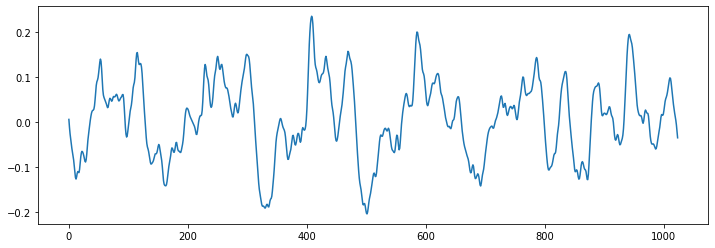

diff from expected pitches (B2, C#3) using nzp=1024: [-12.78512587 -22.78512587]
diff from expected pitches (B2, C#3) using nzp=2048: [-12.78512587 -23.14209399]
diff from expected pitches (B2, C#3) using nzp=3000: [-12.70801064 -22.95357987]


In [22]:
start = 5000
N = 1024
plt.plot(snd2[start:start+N])
plt.show()

def print_pitches_ex5(x, nzp, thresh):
    x_w = zpad(x, nzp)
    X = np.abs(np.fft.rfft(x_w))
    peaks = fmp.find_peaks(X, thresh=thresh)
    p = [freq_to_pitch(f) for f in bin_to_freq(peaks, nzp)]
    diff = np.array([47, 49]) - p
    print(f'diff from expected pitches (B2, C#3) using nzp={nzp}: {diff}')


print_pitches_ex5(x, 1024, 0.2)
print_pitches_ex5(x, 2048, 0.25)
print_pitches_ex5(x, 3000, 0.27)

The pitches played by the piano are B2 and C#3 (MIDI 47 and 49). Yet these results don't seem very good. Why is that?

*Answer:* there is a lot of irregularity on this signal, likely due to the dissonant frequencies fighting each other. The smaller sized window does not capture enough information about this signal for the DFT to accurately tell them apart. In this case the zero padding does not help, since it cannot recover the information we lost by using the small N=1024 window.

In [ ]:
connect_to_queue()

## Exercise 6

Let's increase $N$ in a different way - by using a larger initial window (grabbing a larger portion of the audio) instead of zero-padding.

Start with the same `snd2` of Exercise 5, but this time, slice off a larger and larger portion of the audio to create the initial DFT. Don't forget to apply the Hann window. Then, find the pitches corresponding to the DFT peaks.

- For what value of $N$ can you start to see two pitches? 
- For what value of $N$ do the pitches become accurate?

*Answer*:
- At $N=2048$
- At $N=4096$


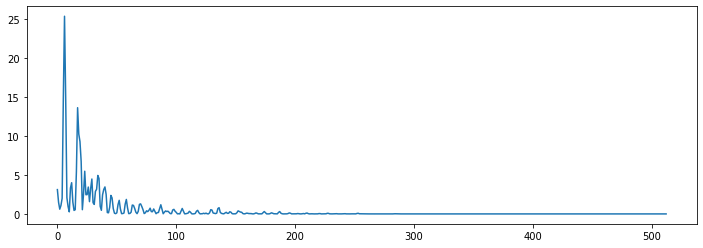


pitches from DFT: [47.7851258703449, 59.7851258703449]
diff from expected pitches (B2, C#3) w/ N=1024: [ -0.78512587 -10.78512587]


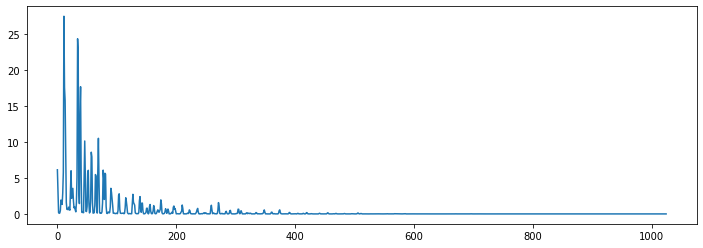


pitches from DFT: [46.27875528533859, 59.04831933437518]
diff from expected pitches (B2, C#3) w/ N=2048: [  0.72124471 -10.04831933]


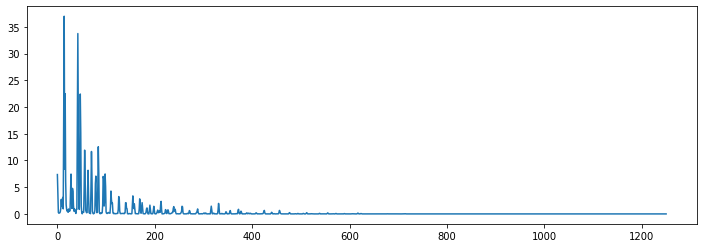


pitches from DFT: [47.001286371788886, 49.31302730709764]
diff from expected pitches (B2, C#3) w/ N=2500: [-0.00128637 -0.31302731]


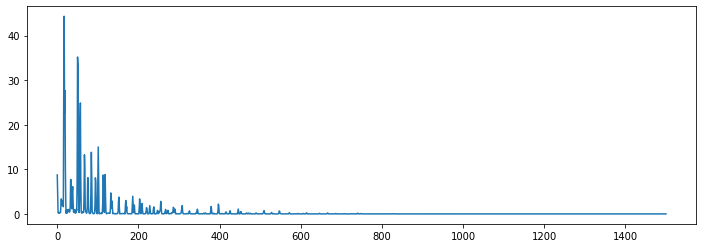


pitches from DFT: [47.206168532096186, 49.13174459841514]
diff from expected pitches (B2, C#3) w/ N=3000: [-0.20616853 -0.1317446 ]


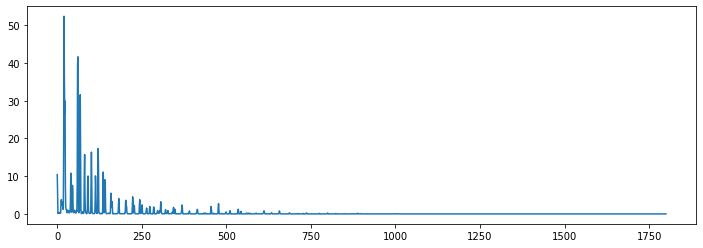


pitches from DFT: [46.86333870573493, 49.28294503977074]
diff from expected pitches (B2, C#3) w/ N=3600: [ 0.13666129 -0.28294504]


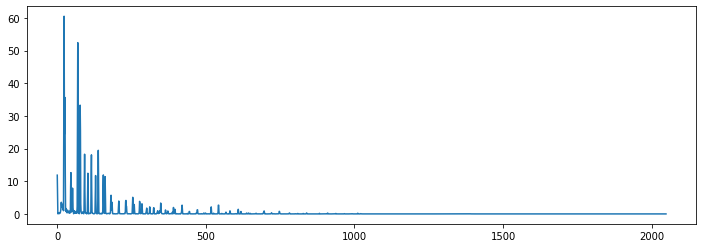


pitches from DFT: [47.04831933437518, 49.17085247938414]
diff from expected pitches (B2, C#3) w/ N=4096: [-0.04831933 -0.17085248]


In [31]:
def print_pitches_ex6(N, thresh):
    start = 5000
    x = snd2[start:start+N]
    x_w = x * np.hanning(N)
    X = np.abs(np.fft.rfft(x_w))
    plt.plot(X)
    plt.show()
    peaks = fmp.find_peaks(X, thresh=thresh)
    p = [freq_to_pitch(f) for f in bin_to_freq(peaks[0:2], N)]
    print(f'\npitches from DFT: {p}')
    diff = np.array([47, 49]) - p
    print(f'diff from expected pitches (B2, C#3) w/ N={N}: {diff}')
    
print_pitches_ex6(1024, 0.1)
print_pitches_ex6(2048, 0.1)
print_pitches_ex6(2500, 0.1)
print_pitches_ex6(3000, 0.1)
print_pitches_ex6(3600, 0.1)
print_pitches_ex6(4096, 0.1)

In [ ]:
connect_to_queue('checkoff')